# Thresholding-Based Segmentation

This task focuses on image segmentation using thresholding techniques, specifically global thresholding via Otsu’s method and adaptive (local) thresholding. Thresholding is a fundamental technique in image processing that segments an image by converting it into a binary image based on intensity values. In this exercise, we implement both global and adaptive thresholding methods, visualize the results, compare their effectiveness, and analyze their performance using histograms and practical considerations. This approach is commonly used in applications such as document analysis, medical imaging, and quality control in industrial settings

___

## Part a

In this exercise, we implemented global thresholding using Otsu’s method in two ways: first, by manually computing the optimal threshold, and second, by using a built-in library function. This allows us to better understand the underlying algorithm as well as validate our manual implementation. 

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the image
img = cv2.imread("/mnt/e/Term 4/HW/HW8/images/q2/coin.png", cv2.IMREAD_GRAYSCALE)

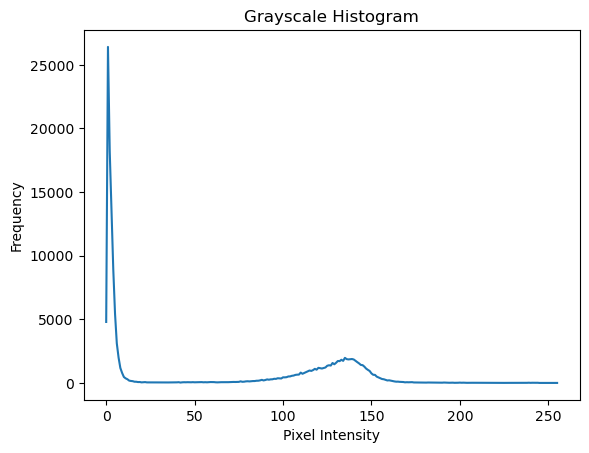

In [3]:
hist = cv2.calcHist([img], [0], None, [256], [0, 256])

plt.plot(hist)
plt.title("Grayscale Histogram")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.show()


In [4]:
hist = hist.flatten()
total_pixels = img.size

# Normalize histogram
prob = hist / total_pixels

In [5]:
max_between_var = 0
optimal_thresh = 0
cum_prob = np.cumsum(prob)
cum_mean = np.cumsum(prob * np.arange(256))
global_mean = cum_mean[-1]

In [6]:
for k in range(1, 256):
    w1 = cum_prob[k]
    w2 = 1 - w1

    if w1 == 0 or w2 == 0:
        continue

    mu1 = cum_mean[k] / w1
    mu2 = (global_mean - cum_mean[k]) / w2

    between_var = w1 * w2 * ((mu1 - mu2) ** 2)

    if between_var > max_between_var:
        max_between_var = between_var
        optimal_thresh = k

In [7]:
print(f"Otsu optimal threshold: {optimal_thresh}")

Otsu optimal threshold: 66


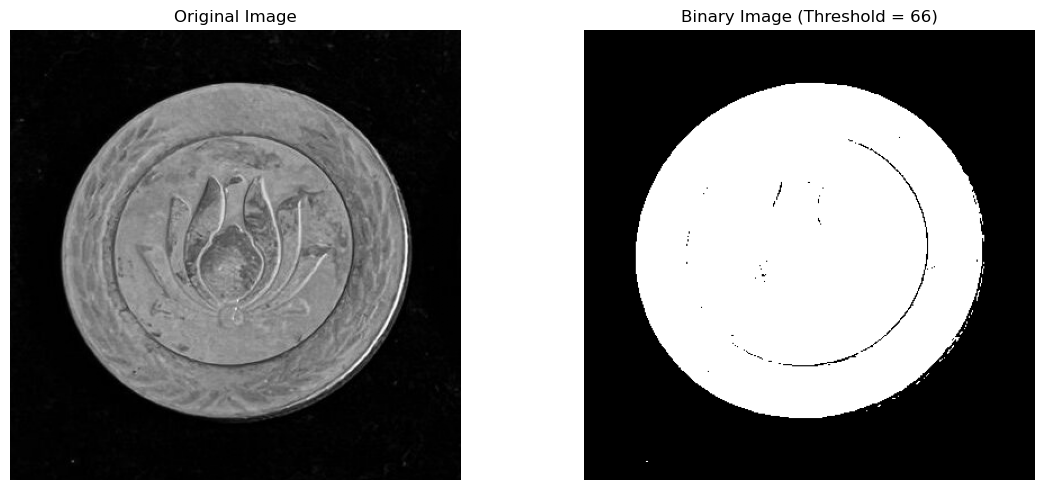

In [8]:
# Apply the optimal threshold to binarize the image
_, binary = cv2.threshold(img, optimal_thresh, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(binary, cmap='gray')
plt.title(f"Binary Image (Threshold = {optimal_thresh})")
plt.axis('off')

plt.tight_layout()
plt.show()

___

In this section, we apply Otsu’s method for global thresholding using OpenCV’s built-in function cv2.threshold. This function automatically computes the optimal threshold value that minimizes intra-class variance. We load the image in grayscale mode and apply Otsu’s method by setting the threshold value to 0 and adding the flag cv2.THRESH_OTSU. The output includes the optimal threshold value and the resulting binary image. The result is then visualized alongside the original grayscale image to observe the effect of thresholding.

___

Otsu optimal threshold: 66.0


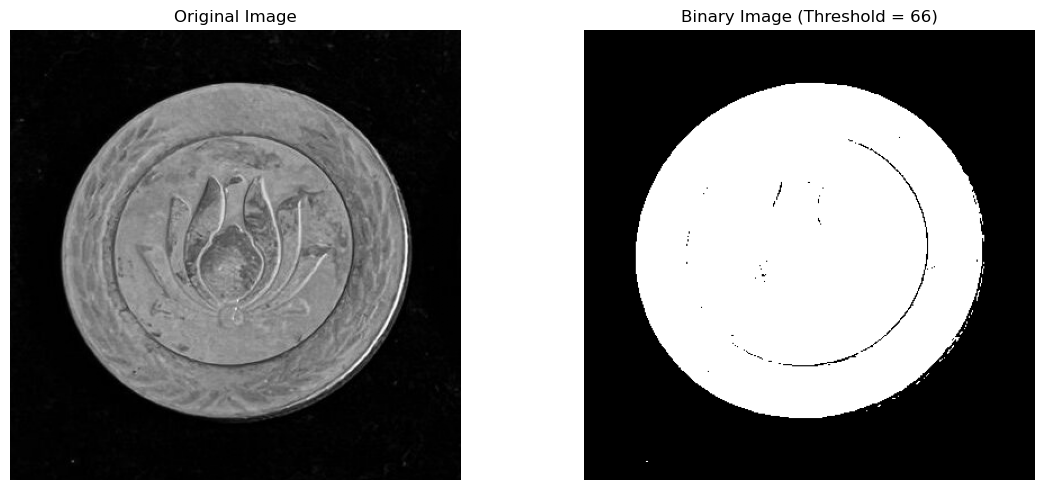

In [9]:
# Apply Otsu's thresholding 
ret, binary = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Print the calculated optimal threshold
print(f"Otsu optimal threshold: {ret}")

# Display the original and thresholded images 
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(binary, cmap='gray')
plt.title(f"Binary Image (Threshold = {int(ret)})")
plt.axis('off')

plt.tight_layout()
plt.show()

___

## Part b

In [203]:
kernel_size = 15
a = 3
b = 0.6

In [204]:
# Load the image
img = cv2.imread("/mnt/e/Term 4/HW/HW8/images/q2/coin.png", cv2.IMREAD_GRAYSCALE).astype(np.float32)

# Apply Gaussian blur before thresholding
img = cv2.GaussianBlur(img, (3, 3), sigmaX=0.4)


In [205]:
# Compute local mean
mean_local = cv2.blur(img, (kernel_size, kernel_size))

In [206]:
# Compute local sd
squared_img = img ** 2
mean_squared = cv2.blur(squared_img, (kernel_size, kernel_size))
std_local = np.sqrt(mean_squared - mean_local ** 2)


In [207]:
# Compute threshold
T_xy = a * std_local + b * mean_local

In [208]:
# Apply threshold
binary_img = (img > T_xy).astype(np.uint8) * 255

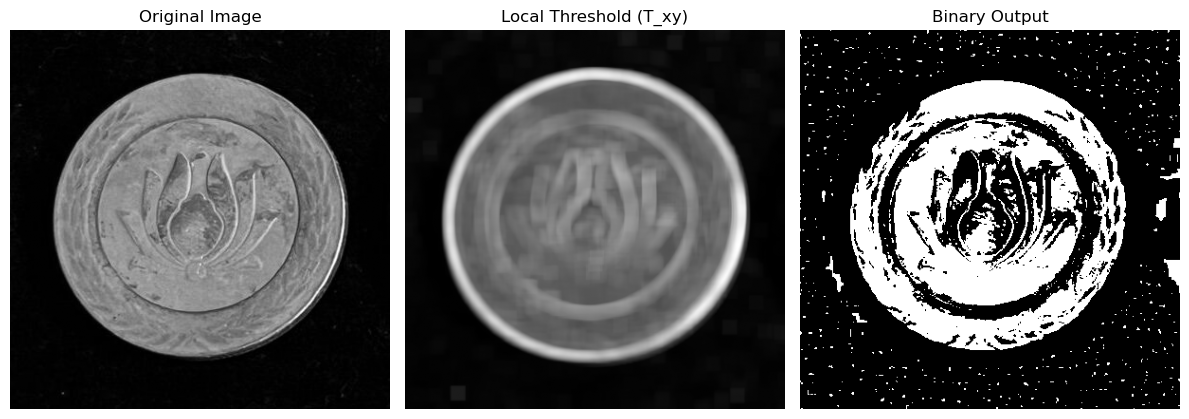

In [209]:
# Display the results
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Local Threshold (T_xy)')
plt.imshow(T_xy, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Binary Output')
plt.imshow(binary_img, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

In [210]:
img[1:10, 1:10].mean()

2.642096

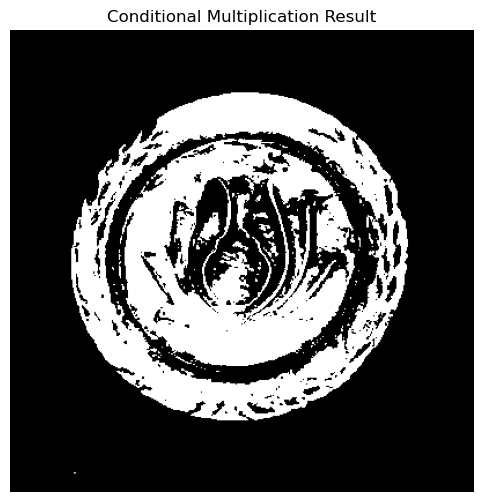

In [211]:
# Read two grayscale images
img1 = img
img2 = binary_img

# Threshold value for img1
threshold = 55

# Create a mask: where img1 is below threshold
mask = img1 < threshold

# Create output image
result = np.where(mask, 0 * img2, img2)

# Normalize and convert to uint8 for saving or displaying
result = np.clip(result / result.max() * 255, 0, 255).astype(np.uint8)

# Show the result using matplotlib
plt.figure(figsize=(8, 6))
plt.imshow(result, cmap='gray')
plt.title('Conditional Multiplication Result')
plt.axis('off')
plt.show()


Best a = 0.70, Best b = 0.90, Max Between-Class Variance = 124.92


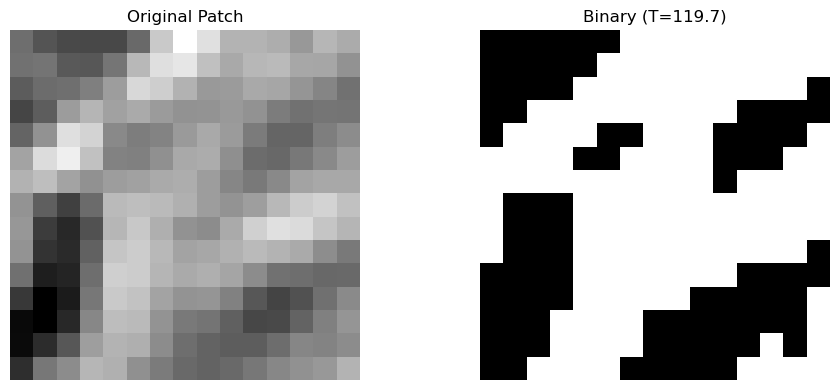

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from itertools import product

# --- Read grayscale image ---

img = img.astype(np.float32)

# --- Define window parameters ---
x, y = 100, 100  # Top-left corner of the window
win_size = 15
patch = img[y:y+win_size, x:x+win_size]

# --- Precompute mean and std of the patch ---
mu = np.mean(patch)
sigma = np.std(patch)

# --- Range of a and b values to test ---
a_values = np.linspace(0.1, 1.0, 10)
b_values = np.linspace(0.1, 1.0, 10)

best_variance = -1
best_a, best_b = None, None

# --- Try all (a, b) combinations ---
for a, b in product(a_values, b_values):
    T = a * sigma + b * mu
    foreground = patch[patch > T]
    background = patch[patch <= T]

    # Avoid division by zero
    if len(foreground) == 0 or len(background) == 0:
        continue

    w0 = len(background) / patch.size
    w1 = len(foreground) / patch.size
    mu0 = np.mean(background)
    mu1 = np.mean(foreground)
    muT = np.mean(patch)

    # Compute between-class variance
    sigma_b2 = w0 * (mu0 - muT)**2 + w1 * (mu1 - muT)**2

    if sigma_b2 > best_variance:
        best_variance = sigma_b2
        best_a = a
        best_b = b

# --- Display result ---
print(f"Best a = {best_a:.2f}, Best b = {best_b:.2f}, Max Between-Class Variance = {best_variance:.2f}")

# Optional: visualize the patch and its thresholded version
T_opt = best_a * sigma + best_b * mu
binary_patch = (patch > T_opt).astype(np.uint8) * 255

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.title("Original Patch")
plt.imshow(patch, cmap='gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.title(f"Binary (T={T_opt:.1f})")
plt.imshow(binary_patch, cmap='gray')
plt.axis('off')
plt.tight_layout()
plt.show()


In [ ]:
import cv2
import numpy as np
from itertools import product
from tqdm import tqdm

# Read grayscale image

H, W = img.shape
output = np.zeros_like(img, dtype=np.uint8)

# Parameters
win_size = 15
half = win_size // 2
a_values = np.linspace(0.1, 1.0, 5)  # fewer steps for speed
b_values = np.linspace(0.1, 1.0, 5)

# Pad the image to handle borders
padded = cv2.copyMakeBorder(img, half, half, half, half, borderType=cv2.BORDER_REFLECT)

# Loop over each pixel in the image
for i in tqdm(range(H)):
    for j in range(W):
        # Extract local window
        patch = padded[i:i+win_size, j:j+win_size]
        mu = np.mean(patch)
        sigma = np.std(patch)

        best_variance = -1
        best_T = 0

        # Test combinations of a and b
        for a, b in product(a_values, b_values):
            T = a * sigma + b * mu
            foreground = patch[patch > T]
            background = patch[patch <= T]
            if len(foreground) == 0 or len(background) == 0:
                continue

            w0 = len(background) / patch.size
            w1 = len(foreground) / patch.size
            mu0 = np.mean(background)
            mu1 = np.mean(foreground)
            muT = np.mean(patch)

            sigma_b2 = w0 * (mu0 - muT)**2 + w1 * (mu1 - muT)**2

            if sigma_b2 > best_variance:
                best_variance = sigma_b2
                best_T = T

        # Apply threshold to center pixel
        output[i, j] = 255 if img[i, j] > best_T else 0

# Save or show result
cv2.imwrite("output_adaptive_thresholding.png", output)
cv2.imshow("Result", output)
cv2.waitKey(0)
cv2.destroyAllWindows()


  0%|          | 0/400 [00:00<?, ?it/s]

100%|██████████| 400/400 [01:25<00:00,  4.66it/s]
